# Are the signatures in the galaxy SED at earliest parts of the SFH really lost?
We have been having issues with significant underestimation of the early SFH of Yirui's simulated PSB lately, so to investigate, I am using bagpipes to calculate the spectrum contribution of only the early 0-4 Gyr of the SFH and then add that to the current spectrum to see if this part of the SFH has any significant contribution on the present-day spectrum. If it does, that would mean Bagpipes/our fitting models are doing something wrong. At least the uncertainties will have to be bigger.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import bagpipes as pipes
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

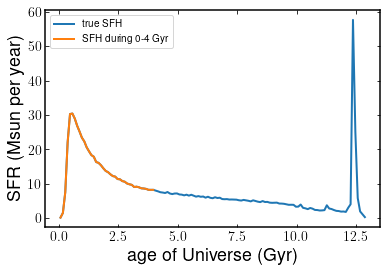

In [87]:
#extract SFH in 0 to 4 in Yirui's simulated galaxy
sim_data = np.loadtxt(fname='../Yirui_test_cube/snap119/2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_snap119_SFH_at_diff_radius.txt')
age_at_z = cosmo.age(0.04).value
model_ages = age_at_z-sim_data[:,0]
mask = model_ages > 0
model_ages = model_ages[mask][::-1]
model_sfh = sim_data[:,2][mask][::-1]
plt.plot(model_ages, model_sfh, label='true SFH')
plt.xlabel('age of Universe (Gyr)')
plt.ylabel('SFR (Msun per year)')

early_model_ages = model_ages[model_ages<4]
early_model_sfh = model_sfh[model_ages<4]
early_model_sfh_ = np.array([(age_at_z-early_model_ages)*10**9, early_model_sfh]).T[::-1]
plt.plot(early_model_ages, early_model_sfh, label='SFH during 0-4 Gyr')
plt.legend()
plt.show()

### Using Bagpipes to create the spectrum of a galaxy with only the 0-4 Gyr part of the SFH of Yirui's simulated PSB
Here, I assume solar metallicity with no evolution. Although Yirui's simulated galaxy does go through metallicity evolution and different parts of the galaxy have different metallicities, since I don't think I have that information from Yirui and he wrote in his paper that the stellar particles in his simulation generally have metallicities close to solar, I am assuming solar. It should not have much influence over the result.

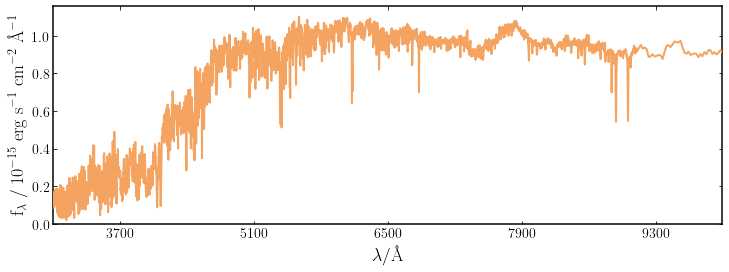

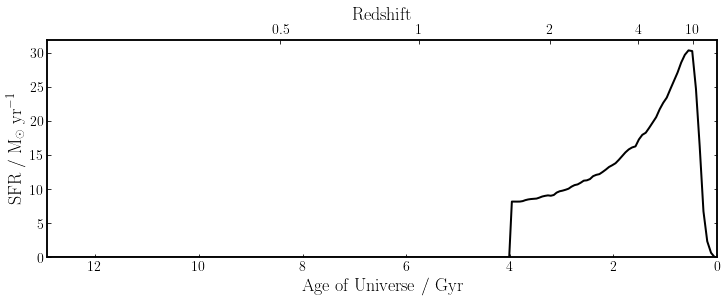

In [88]:
spectrum = np.loadtxt(fname="../Yirui_test_cube/snap119/with_PSF/with_dust/Spectrum_2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_tauv1.0_mu0.3_119star_age.csv", delimiter=',', skiprows=1)
wavelengths = spectrum[:,0]

custom = {}                          # A custom array of SFR values
custom["history"] = early_model_sfh_        # sfhist_array or "sfhist.txt": M_Solar/yr
custom["massformed"] = np.log10(np.trapz(y=early_model_sfh, x=early_model_ages*10**9))
custom["metallicity"] = 1.0          # Z/Z_oldsolar

model_components = {}
model_components['redshift'] = 0.04
model_components['custom'] = custom

model_0_4 = pipes.model_galaxy(model_components, spec_wavs=wavelengths)
fig = model_0_4.plot()
fig = model_0_4.sfh.plot()

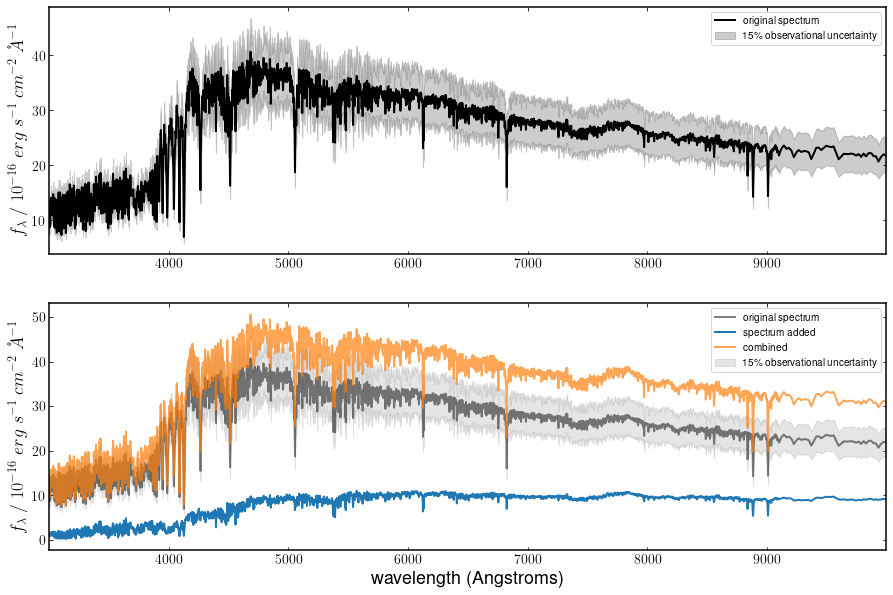

In [89]:
fig,ax = plt.subplots(2,1, figsize=[15,10])
ax[0].plot(spectrum[:,0], spectrum[:,1], color='k', label='original spectrum')
ax[0].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.2, label='15\% observational uncertainty')
ax[0].set_xlim([wavelengths[0],wavelengths[-1]])
#ax[0].set_xlabel('wavelength (Angstroms)')
ax[0].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[0].legend()

ax[1].plot(spectrum[:,0], spectrum[:,1], color='k', alpha=0.5, label='original spectrum')
ax[1].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.1, label='15\% observational uncertainty')
ax[1].plot(wavelengths, model_0_4.spectrum[:,1]*10**16, label='spectrum added')
ax[1].plot(wavelengths, model_0_4.spectrum[:,1]*10**16+spectrum[:,1], alpha=0.7, label='combined')
ax[1].set_xlim([wavelengths[0],wavelengths[-1]])
ax[1].set_xlabel('wavelength (Angstroms)')
ax[1].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[1].legend()
plt.show()

### Some conclusions
So clearly there is a signficant contribution in the galaxy spectrum from stars formed in the first 4 Gyr of the PSB's SFH. This indicates there might be something wrong with Bagpipes/our fitting models. But first, I will try with just 0-2 Gyr part of the SFH again:

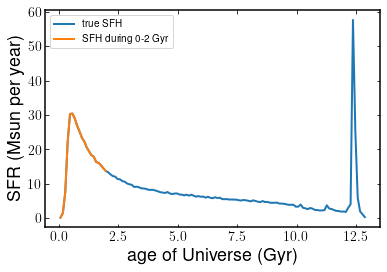

In [90]:
#extract SFH in 0 to 2 in Yirui's simulated galaxy
plt.plot(model_ages, model_sfh, label='true SFH')
plt.xlabel('age of Universe (Gyr)')
plt.ylabel('SFR (Msun per year)')

early_model_ages = model_ages[model_ages<2]
early_model_sfh = model_sfh[model_ages<2]
early_model_sfh_ = np.array([(age_at_z-early_model_ages)*10**9, early_model_sfh]).T[::-1]
plt.plot(early_model_ages, early_model_sfh, label='SFH during 0-2 Gyr')
plt.legend()
plt.show()

### Using Bagpipes to create the spectrum of a galaxy with only the 0-2 Gyr part of the SFH of Yirui's simulated PSB
As before, I assume solar metallicity.

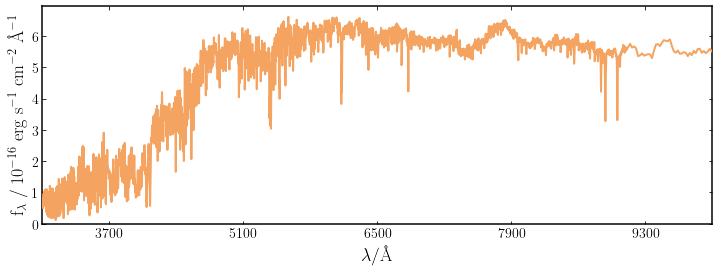

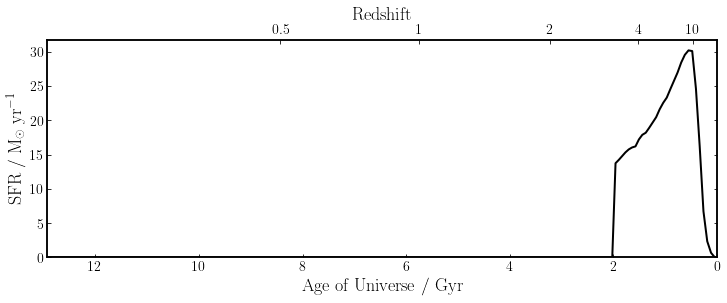

In [92]:
custom = {}                          # A custom array of SFR values
custom["history"] = early_model_sfh_        # sfhist_array or "sfhist.txt": M_Solar/yr
custom["massformed"] = np.log10(np.trapz(y=early_model_sfh, x=early_model_ages*10**9))
custom["metallicity"] = 1.0          # Z/Z_oldsolar

model_components = {}
model_components['redshift'] = 0.04
model_components['custom'] = custom

model_0_2 = pipes.model_galaxy(model_components, spec_wavs=wavelengths)
fig = model_0_2.plot()
fig = model_0_2.sfh.plot()

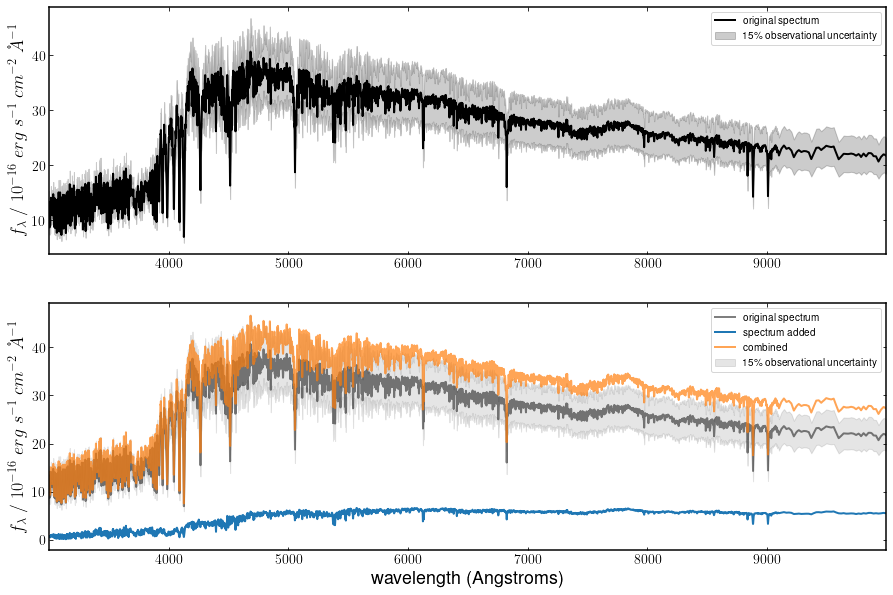

In [93]:
fig,ax = plt.subplots(2,1, figsize=[15,10])
ax[0].plot(spectrum[:,0], spectrum[:,1], color='k', label='original spectrum')
ax[0].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.2, label='15\% observational uncertainty')
ax[0].set_xlim([wavelengths[0],wavelengths[-1]])
#ax[0].set_xlabel('wavelength (Angstroms)')
ax[0].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[0].legend()

ax[1].plot(spectrum[:,0], spectrum[:,1], color='k', alpha=0.5, label='original spectrum')
ax[1].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.1, label='15\% observational uncertainty')
ax[1].plot(wavelengths, model_0_2.spectrum[:,1]*10**16, label='spectrum added')
ax[1].plot(wavelengths, model_0_2.spectrum[:,1]*10**16+spectrum[:,1], alpha=0.7, label='combined')
ax[1].set_xlim([wavelengths[0],wavelengths[-1]])
ax[1].set_xlabel('wavelength (Angstroms)')
ax[1].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[1].legend()
plt.show()

With the lower mass fraction in 0-2 Gyr, the shift in the spectrum now becomes comparable to the observational uncertainty used.<br>

However, before concluding that Bagpipes is doing unsensical things, I have observed that for parametric fits, other than the obvious under-esimation of the early 0-4Gyr population of stars, there is a slight over-estimation of the SFR during 7-12Gyr just before the begin of the starburst. Could the contribution from middle-aged stars formed in this period in the observed spectrum be degenerate with the contribution of a much more massive population of older 0-4Gyr stars? Like before, I will double the SFH in the period 7-12Gyr, and plot the resulting spectrum against the original.

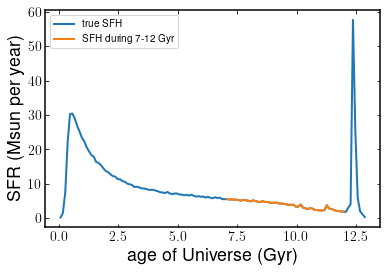

In [94]:
#extract SFH in 7 to 12 in Yirui's simulated galaxy
plt.plot(model_ages, model_sfh, label='true SFH')
plt.xlabel('age of Universe (Gyr)')
plt.ylabel('SFR (Msun per year)')

middle_model_ages = model_ages[(model_ages<12) & (model_ages>7)]
middle_model_sfh = model_sfh[(model_ages<12) & (model_ages>7)]
middle_model_sfh_ = np.array([(age_at_z-middle_model_ages)*10**9, middle_model_sfh]).T[::-1]
plt.plot(middle_model_ages, middle_model_sfh, label='SFH during 7-12 Gyr')
plt.legend()
plt.show()

### Using Bagpipes to create the spectrum of a galaxy with only the 7-12 Gyr part of the SFH of Yirui's simulated PSB
As before, I assume solar metallicity.

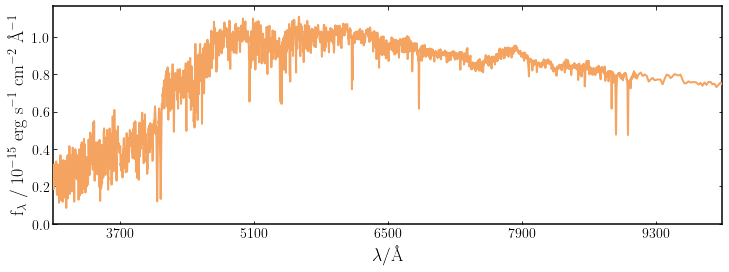

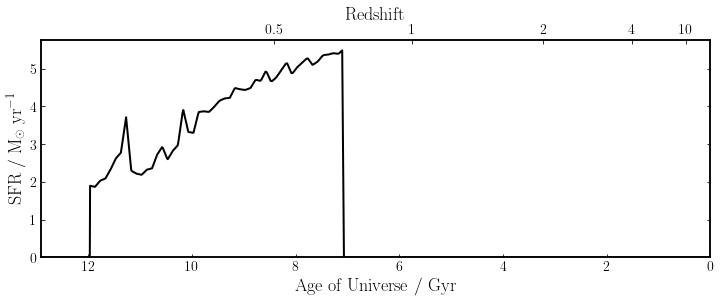

In [95]:
custom = {}                          # A custom array of SFR values
custom["history"] = middle_model_sfh_        # sfhist_array or "sfhist.txt": M_Solar/yr
custom["massformed"] = np.log10(np.trapz(y=middle_model_sfh, x=middle_model_ages*10**9))
custom["metallicity"] = 1.0          # Z/Z_oldsolar

model_components = {}
model_components['redshift'] = 0.04
model_components['custom'] = custom

model_7_12 = pipes.model_galaxy(model_components, spec_wavs=wavelengths)
fig = model_7_12.plot()
fig = model_7_12.sfh.plot()

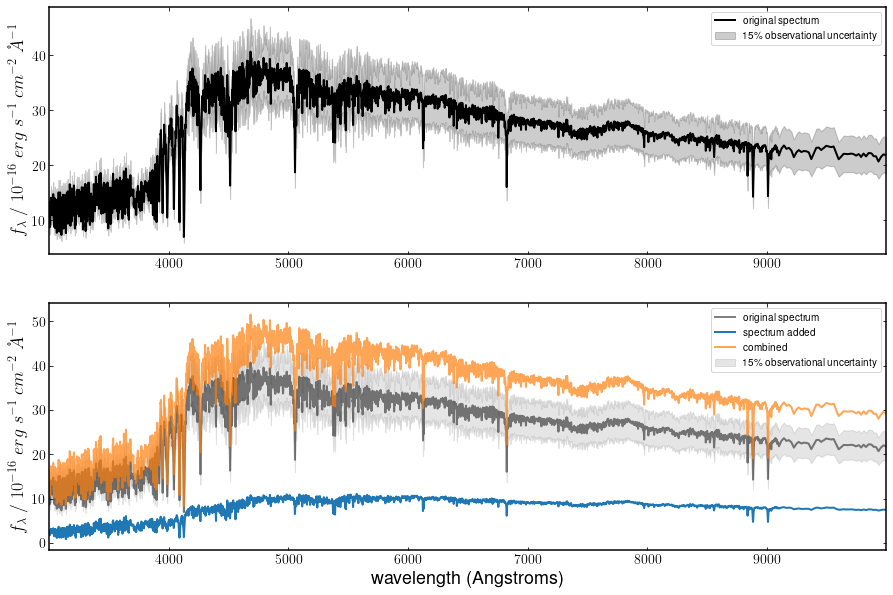

In [96]:
fig,ax = plt.subplots(2,1, figsize=[15,10])
ax[0].plot(spectrum[:,0], spectrum[:,1], color='k', label='original spectrum')
ax[0].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.2, label='15\% observational uncertainty')
ax[0].set_xlim([wavelengths[0],wavelengths[-1]])
#ax[0].set_xlabel('wavelength (Angstroms)')
ax[0].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[0].legend()

ax[1].plot(spectrum[:,0], spectrum[:,1], color='k', alpha=0.5, label='original spectrum')
ax[1].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.1, label='15\% observational uncertainty')
ax[1].plot(wavelengths, model_7_12.spectrum[:,1]*10**16, label='spectrum added')
ax[1].plot(wavelengths, model_7_12.spectrum[:,1]*10**16+spectrum[:,1], alpha=0.7, label='combined')
ax[1].set_xlim([wavelengths[0],wavelengths[-1]])
ax[1].set_xlabel('wavelength (Angstroms)')
ax[1].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[1].legend()
plt.show()

It does look very similar to the shift in the spectrum when doubling the mass formed in the 0-4Gyr period. Now plotting this together with that for the 0-4Gyr:

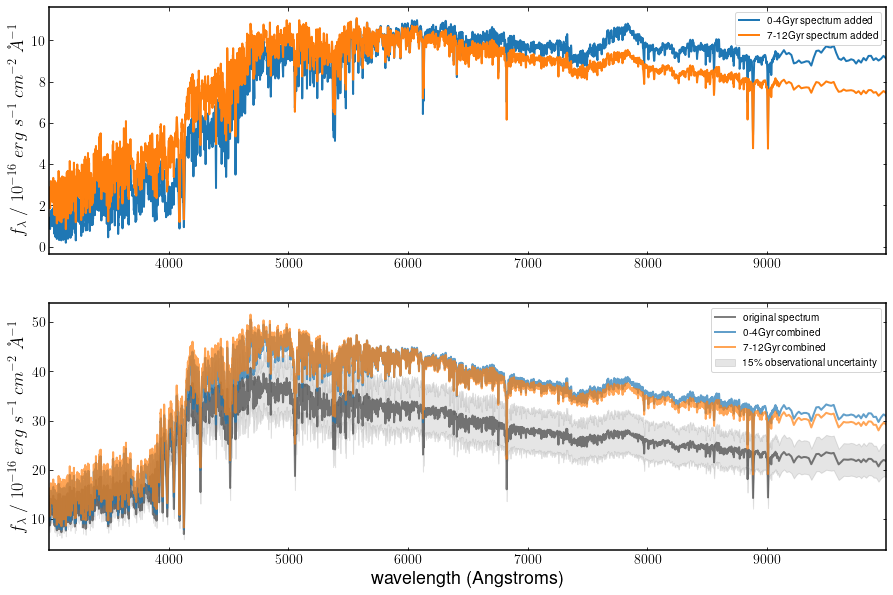

In [99]:
fig,ax = plt.subplots(2,1, figsize=[15,10])
ax[0].plot(wavelengths, model_0_4.spectrum[:,1]*10**16, label='0-4Gyr spectrum added')
ax[0].plot(wavelengths, model_7_12.spectrum[:,1]*10**16, label='7-12Gyr spectrum added')
ax[0].set_xlim([wavelengths[0],wavelengths[-1]])
ax[0].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[0].legend()

ax[1].plot(spectrum[:,0], spectrum[:,1], color='k', alpha=0.5, label='original spectrum')
ax[1].fill_between(spectrum[:,0], spectrum[:,1]-spectrum[:,2], spectrum[:,1]+spectrum[:,2], color='k', alpha=0.1, label='15\% observational uncertainty')
ax[1].plot(wavelengths, model_0_4.spectrum[:,1]*10**16+spectrum[:,1], alpha=0.7, label='0-4Gyr combined')
ax[1].plot(wavelengths, model_7_12.spectrum[:,1]*10**16+spectrum[:,1], alpha=0.7, label='7-12Gyr combined')
ax[1].set_xlim([wavelengths[0],wavelengths[-1]])
ax[1].set_xlabel('wavelength (Angstroms)')
ax[1].set_ylabel(r'$f_{\lambda}\;/\;10^{-16}\;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$')
ax[1].legend()
plt.show()

The two looks very similar, with the difference well within given observational uncertainties. Could this be the reason? Of course this degeneracy should have been picked up by the nested sampler via exploring all parameter space, but juding from the uncertainties given to the both parametric and non-parametric posterior SFH fit, it seems the sampler is not exploring nearly enough.